In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os
import os.path as op
%matplotlib inline
import mne
from mne.datasets import sample
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams.update({'font.size': 15})
#update working directory
os.chdir('C:\\Users\\Esimk_000\\Desktop\\School\\Spring 2018\\Cs59866\\EEG Project\\Jupyter_Notebook')
data_path = 'C:\\Users\\Esimk_000\\Desktop\\School\\Spring 2018\\Cs59866\\EEG Project\\Jupyter_Notebook'

In [16]:
raw_vhdr = mne.io.read_raw_brainvision(op.join(data_path, 'suj11_wml2_day2.vhdr'), preload = True)
# type(raw_vhdr.info)

Extracting parameters from C:\Users\Esimk_000\Desktop\School\Spring 2018\Cs59866\EEG Project\Jupyter_Notebook\suj11_wml2_day2.vhdr...
Setting channel info structure...
Reading 0 ... 1704699  =      0.000 ...  1704.699 secs...


In [17]:
raw_vhdr.info

<Info | 17 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, ...
    chs : list | 65 items (EEG: 64, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 500.0 Hz
    meas_date : int | 1523459607
    nchan : int | 65
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 1000.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout : No

## Plot EEG data

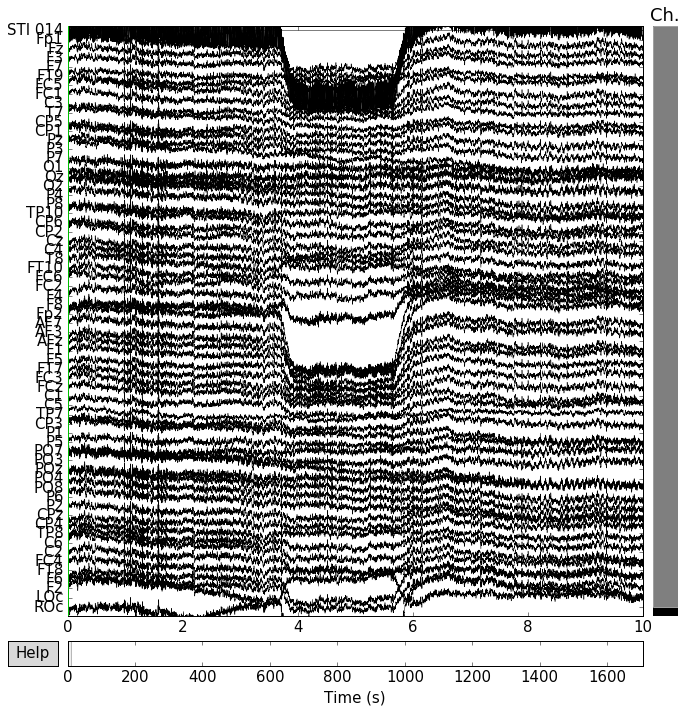

In [18]:
#scalingDict was taken from MNE sample documentation
scalingDict = dict(mag = 1e-12, grad = 4e-11, eeg = 20e-6, eog = 150e-6, ecg=5e-4,
                  emg = 1e-3, ref_meg=1e-12,misc=1e-3, stim=1, resp=1,chpi=1e-4);

raw_vhdr.plot(start = 0.0, duration = 10.0, n_channels =64, scalings = scalingDict);
plt.show()

In [5]:
raw_vhdr._data.shape

(65L, 1704700L)

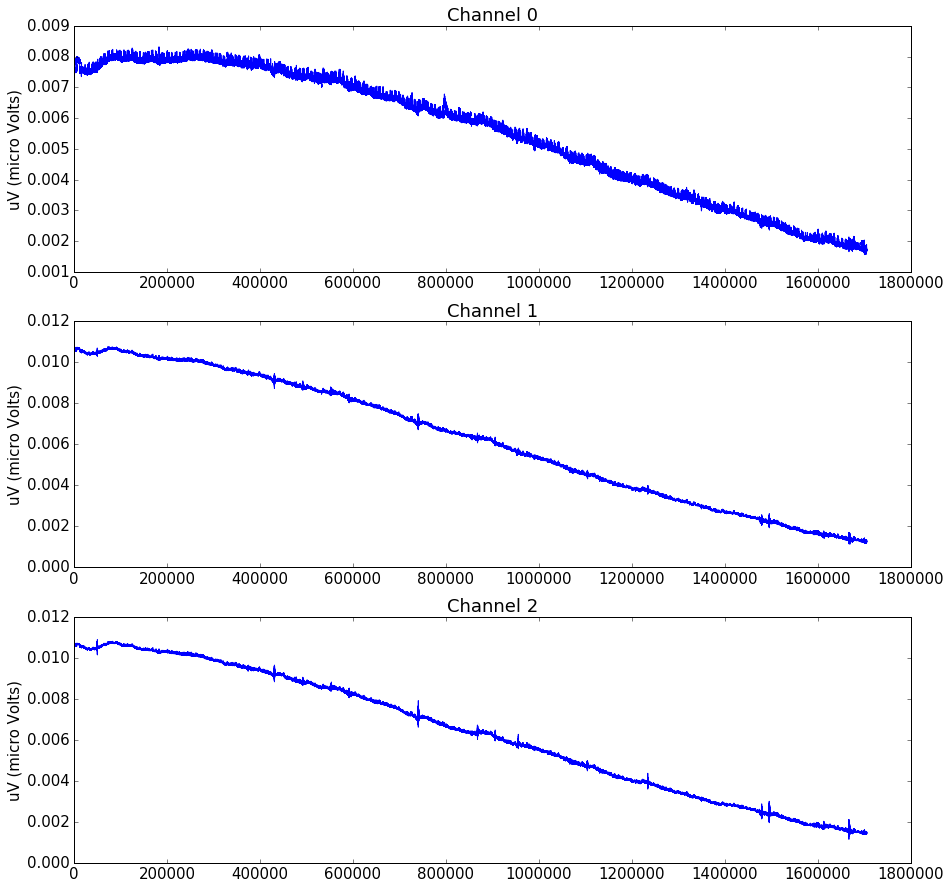

In [24]:
#Plot a few columns/channels from raw_vhdr data
nrows = 3
ncols = 1
fig_kwargs = dict(nrows = nrows, ncols = ncols, figsize = (15,15))
fig, ax = plt.subplots(**fig_kwargs)
for i in range(3):
    ax[i].plot(raw_vhdr._data[i]);
    ax[i].set_title('Channel {}'.format(i))
    ax[i].set_ylabel('uV (micro Volts)')
# for i in range(3):
#     ax[i].hist(raw_vhdr._data[i]);
#     ax[i].set_title('Hist Channel {}'.format(i*3))
#     ax[i].set_xlabel('Frequency (Hz)')
plt.show()
# raw_vhdr

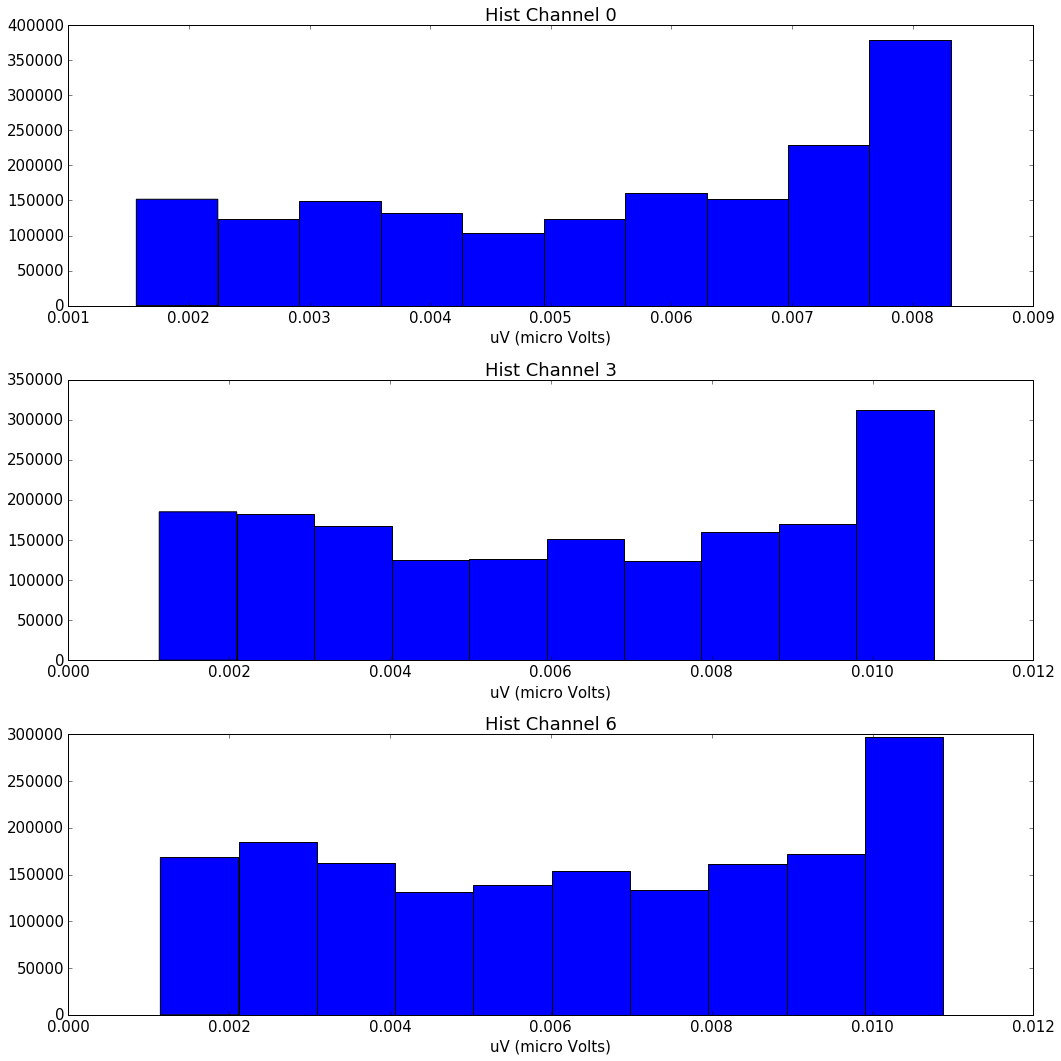

In [25]:
#Plot a few columns/channels from raw_vhdr data
nrows = 3
ncols = 1
fig_kwargs = dict(nrows = nrows, ncols = ncols, figsize = (15,15))
fig, ax = plt.subplots(**fig_kwargs)
# for i in range(3):
#     ax[i].plot(raw_vhdr._data[i]);
#     ax[i].set_title('Channel {}'.format(i*3))
for i in range(3):
    ax[i].hist(raw_vhdr._data[i]);
    ax[i].set_title('Hist Channel {}'.format(i*3))
    ax[i].set_xlabel('uV (micro Volts)')
plt.tight_layout()
plt.show()
# raw_vhdr

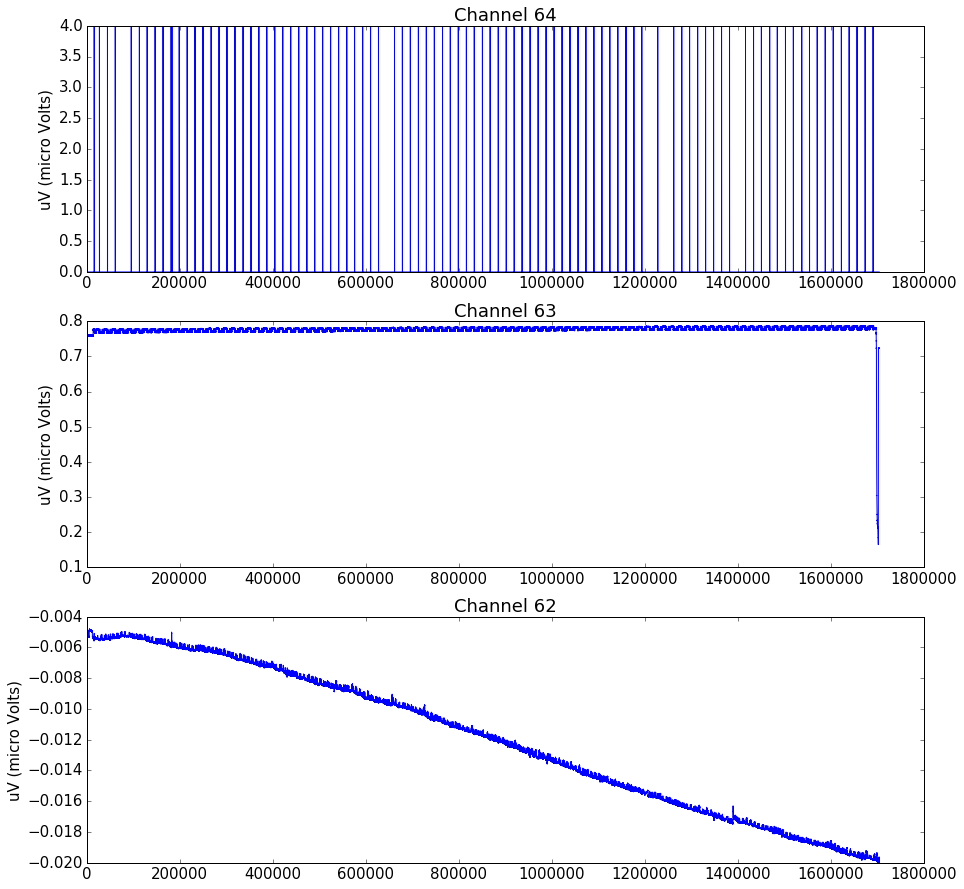

In [26]:
#Plot a few more columns/channels raw_vhdr data
nrows = 3
ncols = 1
fig_kwargs = dict(nrows = nrows, ncols = ncols, figsize = (15,15))
fig, ax = plt.subplots(**fig_kwargs)
for i in range(3):
    ax[i].plot(raw_vhdr._data[-1 -i ]);
    ax[i].set_title('Channel {}'.format(64 - i))
    ax[i].set_ylabel('uV (micro Volts)')
# for i in range(3):
#     ax[i].hist(raw_vhdr._data[i]);
#     ax[i].set_title('Hist Channel {}'.format(i*3))
#     ax[i].set_xlabel('Frequency (Hz)')
plt.show()
# raw_vhdr

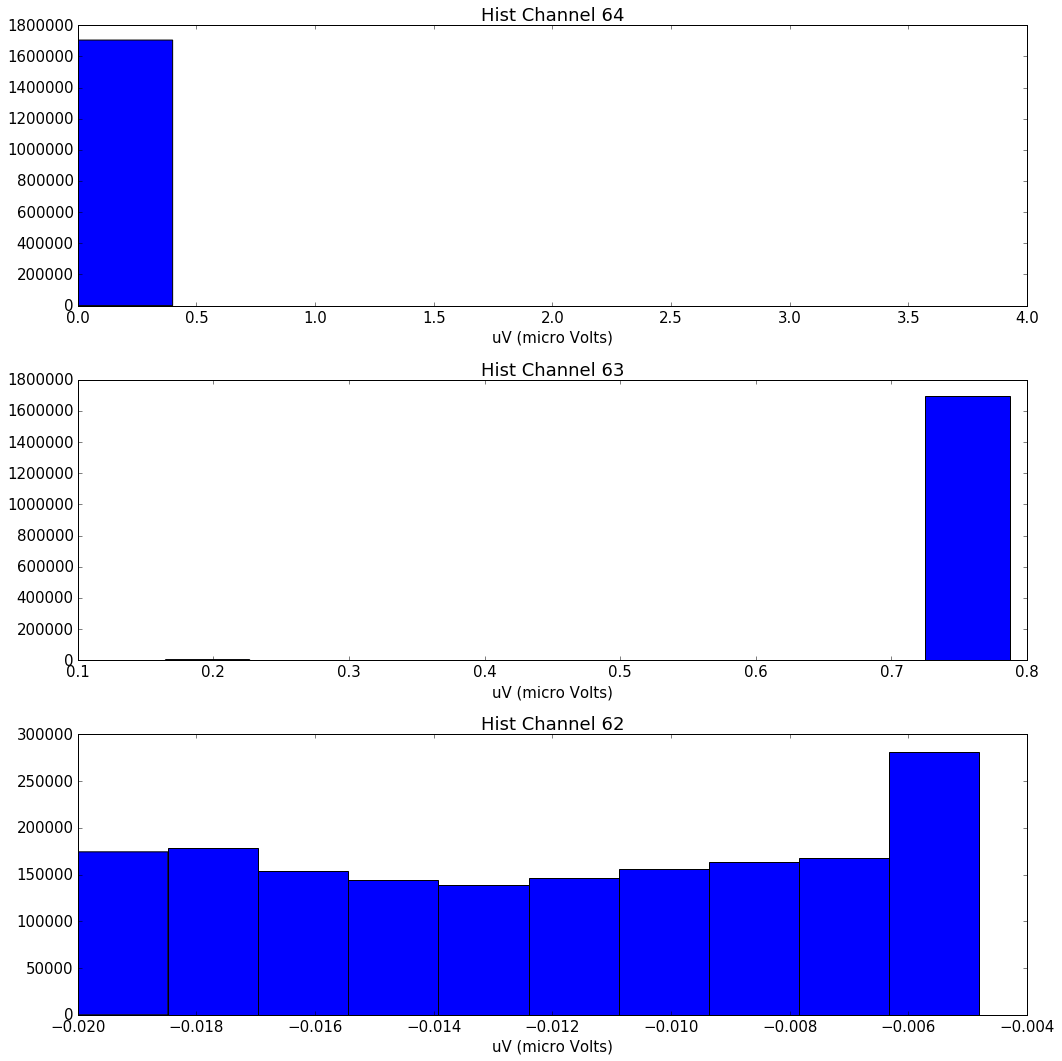

In [27]:
#Plot a few columns/channels from raw_vhdr data
nrows = 3
ncols = 1
fig_kwargs = dict(nrows = nrows, ncols = ncols, figsize = (15,15))
fig, ax = plt.subplots(**fig_kwargs)
for i in range(3):
    ax[i].hist(raw_vhdr._data[-1 - i]);
    ax[i].set_title('Hist Channel {}'.format(64 - i))
    ax[i].set_xlabel('uV (micro Volts)')
plt.tight_layout()
plt.show()
# raw_vhdr

In [10]:
#what is the type of a single point of data
raw_vhdr._dtype

numpy.float64

Effective window size : 2.048 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-25-bb3a796efcf1>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_vhdr.plot_psd(tmax=np.inf, average=False);


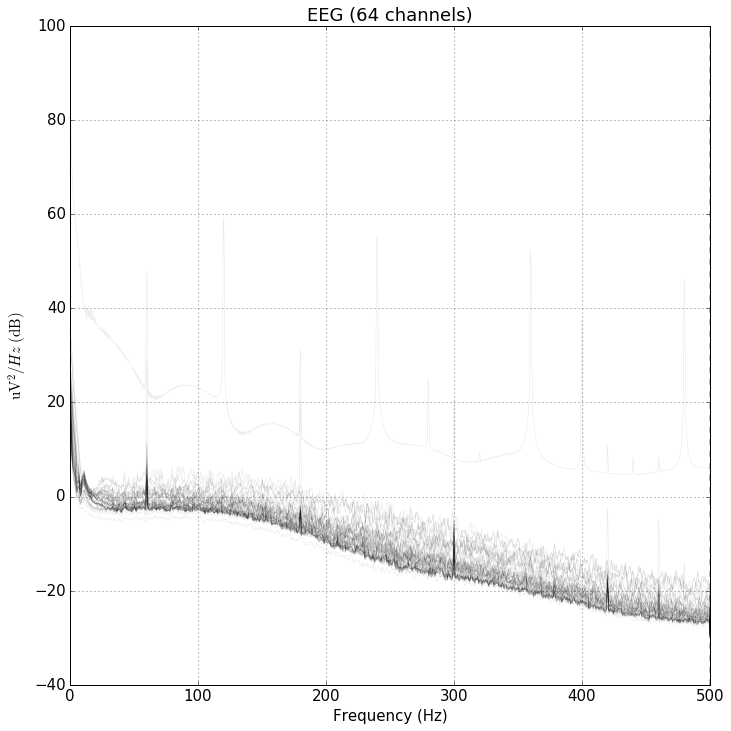

In [25]:
raw_vhdr.plot_psd(tmax=np.inf, average=False);
# plt.plot()

In [ ]:
fig, ax = plt.subplots()
ax.hist(raw_vhdr._data[0]);
ax.set_title('Histogram of a sample of EEG data')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Frequency')
plt.show()

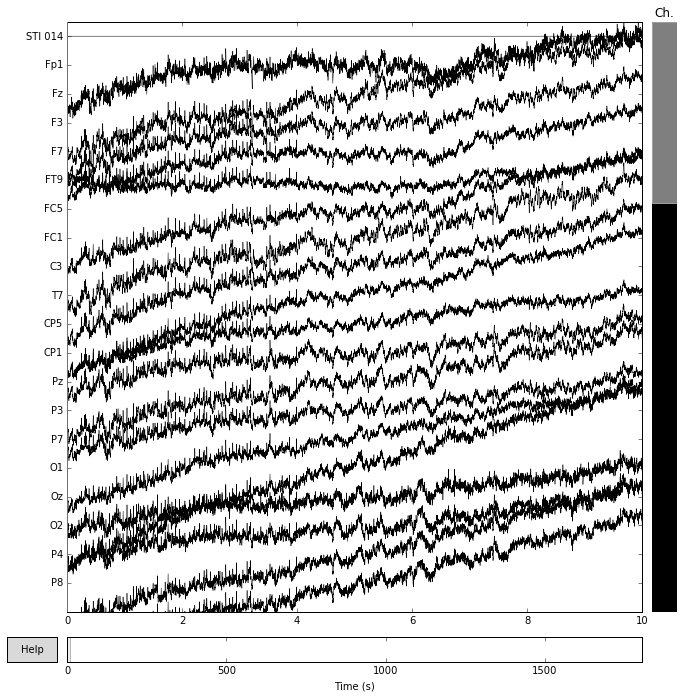

In [201]:
#vizualizing the data
scalingDict = dict(mag = 1e-12, grad = 4e-11, eeg = 20e-6, eog = 150e-6, ecg=5e-4,
                  emg = 1e-3, ref_meg=1e-12,misc=1e-3, stim=1, resp=1,chpi=1e-4)
raw.plot(start = 0.0, duration = 10, n_channels = 20, scalings = scalingDict)
plt.show()

# EDA on EEG Data

## Reading the data
* We use read_raw_brainvision method of mne because each test data sample has three types of files associated with it.
    1. .eeg - The actual readings from EEG scan
    2. .vhdr - header file
        * Header file contains channel number, name of channel, and units of channel
    3. .vmrk - marker file
        

## Types of Variables
* What are the types of the data?
    * Entire 'raw' file is of tpye RawBrainVision.
    

In [28]:
data_path = 'E:\eeg_data'
#read data
epoch = mne.read_epochs(op.join(data_path, 'Ex10_Suj1_Run1-epo.fif'),
                          preload=True)


Reading E:\eeg_data\Ex10_Suj1_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
280 matching events found
Created an SSP operator (subspace dimension = 1)
280 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated


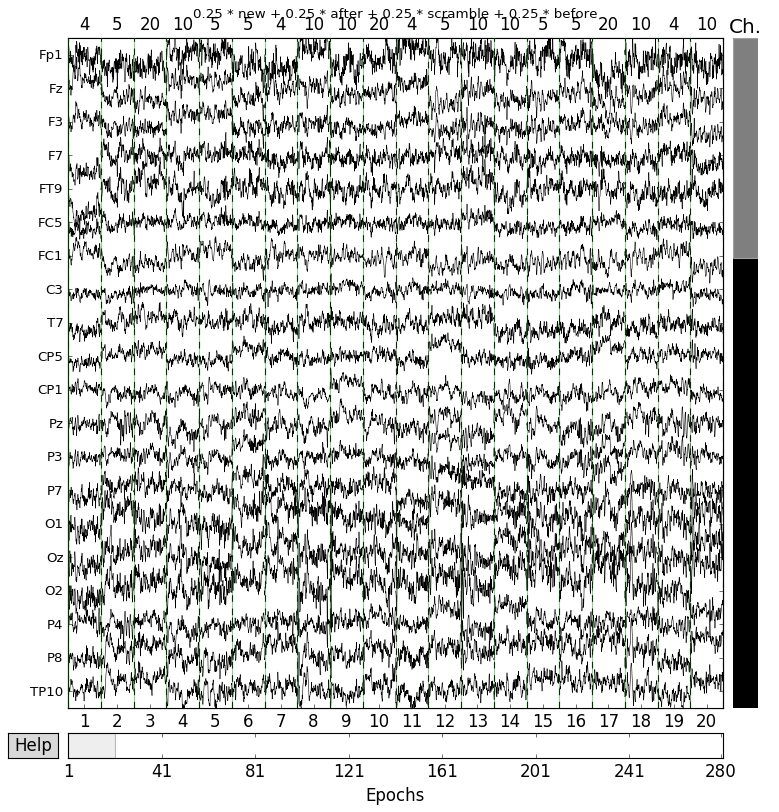

In [29]:
#plot epoch data
epoch.plot();

In [43]:
epoch._data.shape

(280L, 61L, 1401L)

In [34]:
evoked = epoch.average()

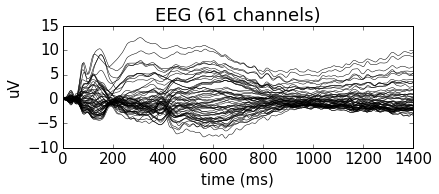

In [45]:
evoked.plot();

In [95]:
max_in_each_epoch = [e.max() for e in epoch]  # doctest:+ELLIPSIS
print(max_in_each_epoch)

[1.4768921022043862e-05, 1.7668516565969247e-05, 1.87744812078041e-05, 2.1506908166481826e-05, 2.0935597111944289e-05, 1.9768226250517569e-05, 1.5932379565278035e-05, 1.6419384933885978e-05, 1.4103609366250824e-05, 1.4710991994523619e-05, 1.401066031978756e-05, 1.6872381760937269e-05, 1.6374471521035568e-05, 1.5449649119963402e-05, 2.0461626442485165e-05, 1.6870709960577923e-05, 1.4796261446642094e-05, 2.0241532780107909e-05, 1.9403617279451397e-05, 1.8690277623837116e-05, 1.4211020630891206e-05, 1.8518654721193633e-05, 1.5471472221686225e-05, 1.9223891107029612e-05, 1.6212700026445702e-05, 2.4723133347073543e-05, 1.8427045405155325e-05, 1.690119932420919e-05, 1.5267690063500012e-05, 1.9154709870698017e-05, 1.4160717761174577e-05, 1.6223936967673852e-05, 1.6516898987723184e-05, 2.0248861220039311e-05, 1.5806998355222525e-05, 1.8904100126418899e-05, 2.0425276235356687e-05, 2.4966687141997803e-05, 1.95207196425219e-05, 1.7455557636061646e-05, 2.0995961318983406e-05, 1.7530077755390115e-0

In [ ]:
max_in_each_epoch = [e.max() for e in epoch]  # doctest:+ELLIPSIS
print(np.max(np.array(max_in_each_epoch)))

In [84]:
max_in_each_epoch = [e.min() for e in epoch]  # doctest:+ELLIPSIS
print(np.max(np.array(max_in_each_epoch)))

-1.04389046548e-05


[2.5389517550585698e-05, 2.9655944433857183e-05, 2.4638337190033958e-05, 2.4585996097961417e-05]


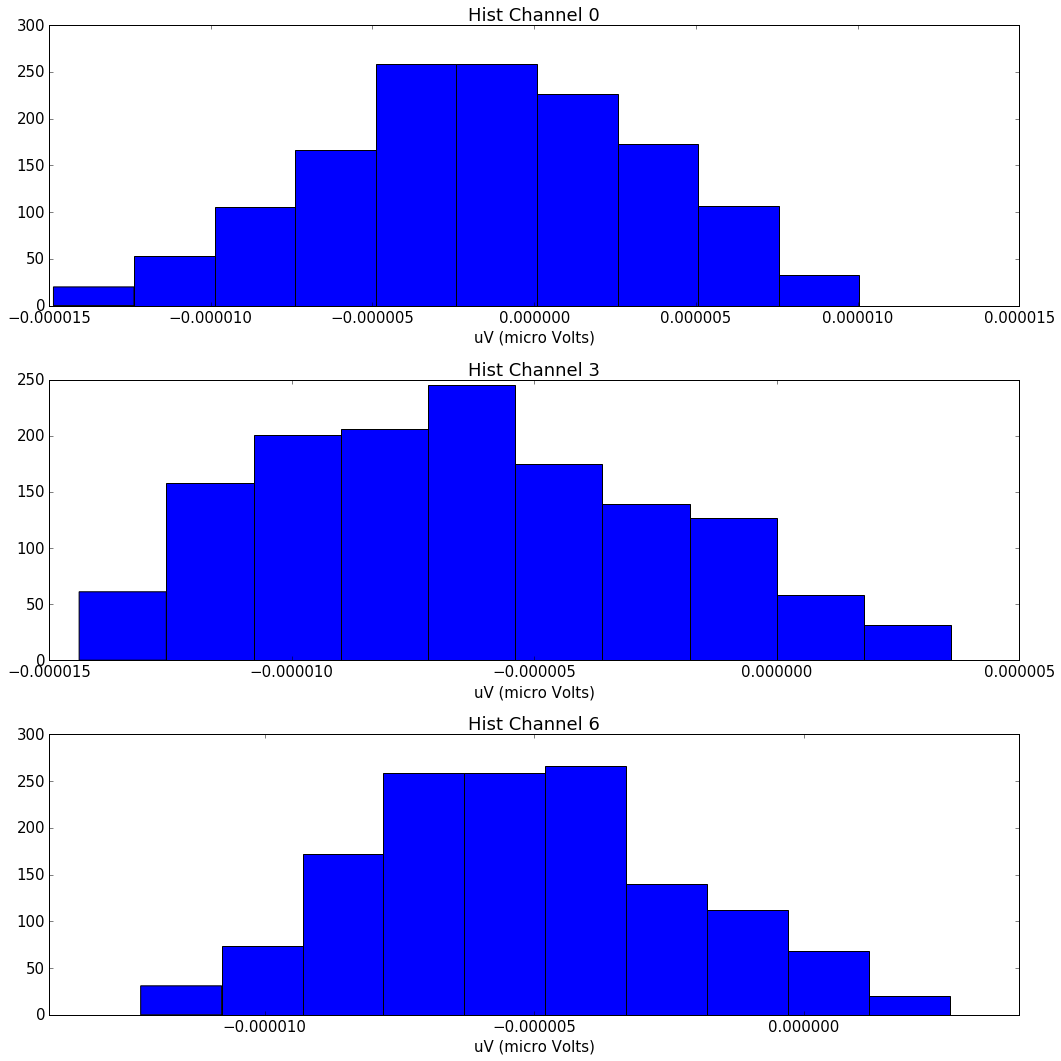

In [75]:
#Plot a few more columns/channels raw_vhdr data
nrows = 3
ncols = 1
fig_kwargs = dict(nrows = nrows, ncols = ncols, figsize = (15,15))
fig, ax = plt.subplots(**fig_kwargs)
# for i in range(3):
#     ax[i].plot(epoch._data[i][i]);
#     ax[i].set_title('Channel {}'.format(i))
#     ax[i].set_ylabel('uV (micro Volts)')
#     ax[i].set_xlabel('Time (s)')
for i in range(3):
    ax[i].hist(epoch._data[i][i]);
    ax[i].set_title('Hist Channel {}'.format(i*3))
    ax[i].set_xlabel('uV (micro Volts)')
plt.tight_layout()
plt.show()
# raw_vhdr

In [48]:
epoch._data.shape

(280L, 61L, 1401L)

In [76]:
data_path = 'E:\eeg_data\ica_140_500_0.1'
#read data
epoch = mne.read_epochs(op.join(data_path, 'subject1_all_runs-epo.fif'),
                          preload=True)

Reading E:\eeg_data\ica_140_500_0.1\subject1_all_runs-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
1121 matching events found
Created an SSP operator (subspace dimension = 1)
1121 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated


In [59]:
epoch._data.shape

(1121L, 61L, 1401L)

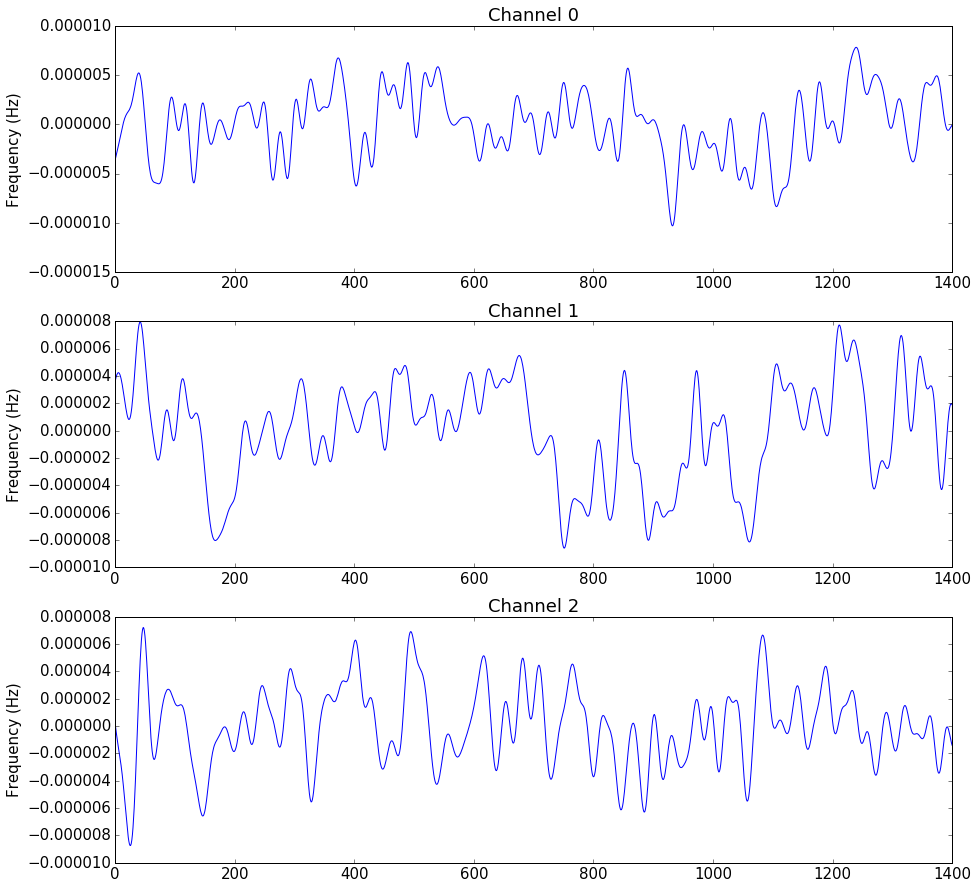

In [77]:
#Plot a few more columns/channels raw_vhdr data
nrows = 3
ncols = 1
fig_kwargs = dict(nrows = nrows, ncols = ncols, figsize = (15,15))
fig, ax = plt.subplots(**fig_kwargs)
for i in range(3):
    ax[i].plot(epoch._data[i][i]);
    ax[i].set_title('Channel {}'.format(i))
    ax[i].set_ylabel('Frequency (Hz)')
# for i in range(3):
#     ax[i].hist(raw_vhdr._data[i]);
#     ax[i].set_title('Hist Channel {}'.format(i*3))
#     ax[i].set_xlabel('Frequency (Hz)')
plt.show()
# raw_vhdr

In [ ]:
#Plot a few more columns/channels raw_vhdr data
nrows = 3
ncols = 1
fig_kwargs = dict(nrows = nrows, ncols = ncols, figsize = (15,15))
fig, ax = plt.subplots(**fig_kwargs)
# for i in range(3):
#     ax[i].plot(epoch._data[i ]);
#     ax[i].set_title('Channel {}'.format(i))
#     ax[i].set_ylabel('Frequency (Hz)')
for i in range(3):
    ax[i].hist(epoch._data[i][i]);
    ax[i].set_title('Hist Channel {}'.format(i))
    ax[i].set_xlabel('Frequency (Hz)')
plt.tight_layout()
plt.show()
# raw_vhdr

In [ ]:
max_in_each_epoch = [e.max() for e in epoch['aud_l']]  # doctest:+ELLIPSIS